In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline
plt.rcParams.update({'font.size': 16})
plt.style.use('default')

In [2]:
df = pd.read_csv('results.csv')

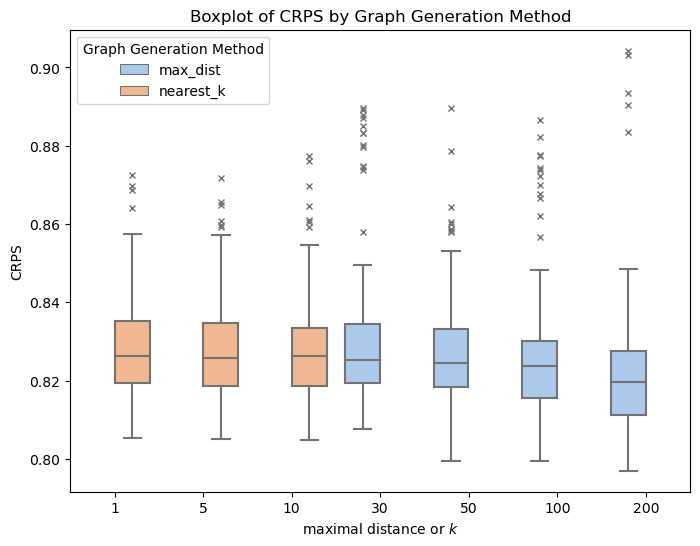

In [100]:
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='generate_graph', y='best_val_loss', hue='graph_generation',palette="pastel", data=df, flierprops={"marker": "x"})
plt.title('Boxplot of CRPS by Graph Generation Method')
plt.xlabel('maximal distance or $k$')
plt.ylabel('CRPS')
plt.legend(title='Graph Generation Method')
plt.savefig("Boxplot_CRPS_by_Graph_Generation_Method.pdf", format="pdf", bbox_inches="tight")

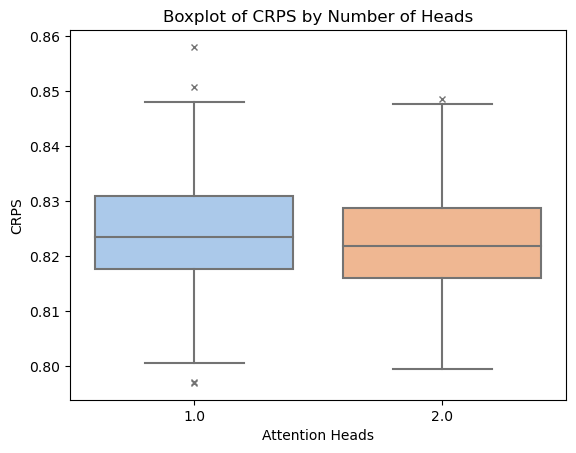

In [101]:
# Create a boxplot
sns.boxplot(x='heads', y='best_val_loss', palette="pastel", data=df, flierprops={"marker": "x"})
plt.title('Boxplot of CRPS by Number of Heads')
plt.xlabel('Attention Heads')
plt.ylabel('CRPS')
plt.savefig("Boxplot_CRPS_by_Heads.pdf", format="pdf", bbox_inches="tight")

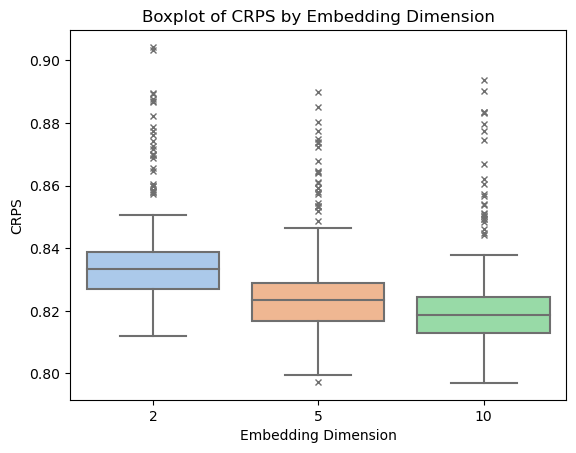

In [102]:
# Create a boxplot
sns.boxplot(x='embed_dim', y='best_val_loss', palette="pastel", data=df, flierprops={"marker": "x"})
plt.title('Boxplot of CRPS by Embedding Dimension')
plt.xlabel('Embedding Dimension')
plt.ylabel('CRPS')
plt.savefig("Boxplot_CRPS_by_Embedding_Dimension.pdf", format="pdf", bbox_inches="tight")

In [3]:
# Sort dataframe and pick the 300 best runs to make a parallel coordinates plot
df_300 = df.sort_values(by='best_val_loss').head(300)